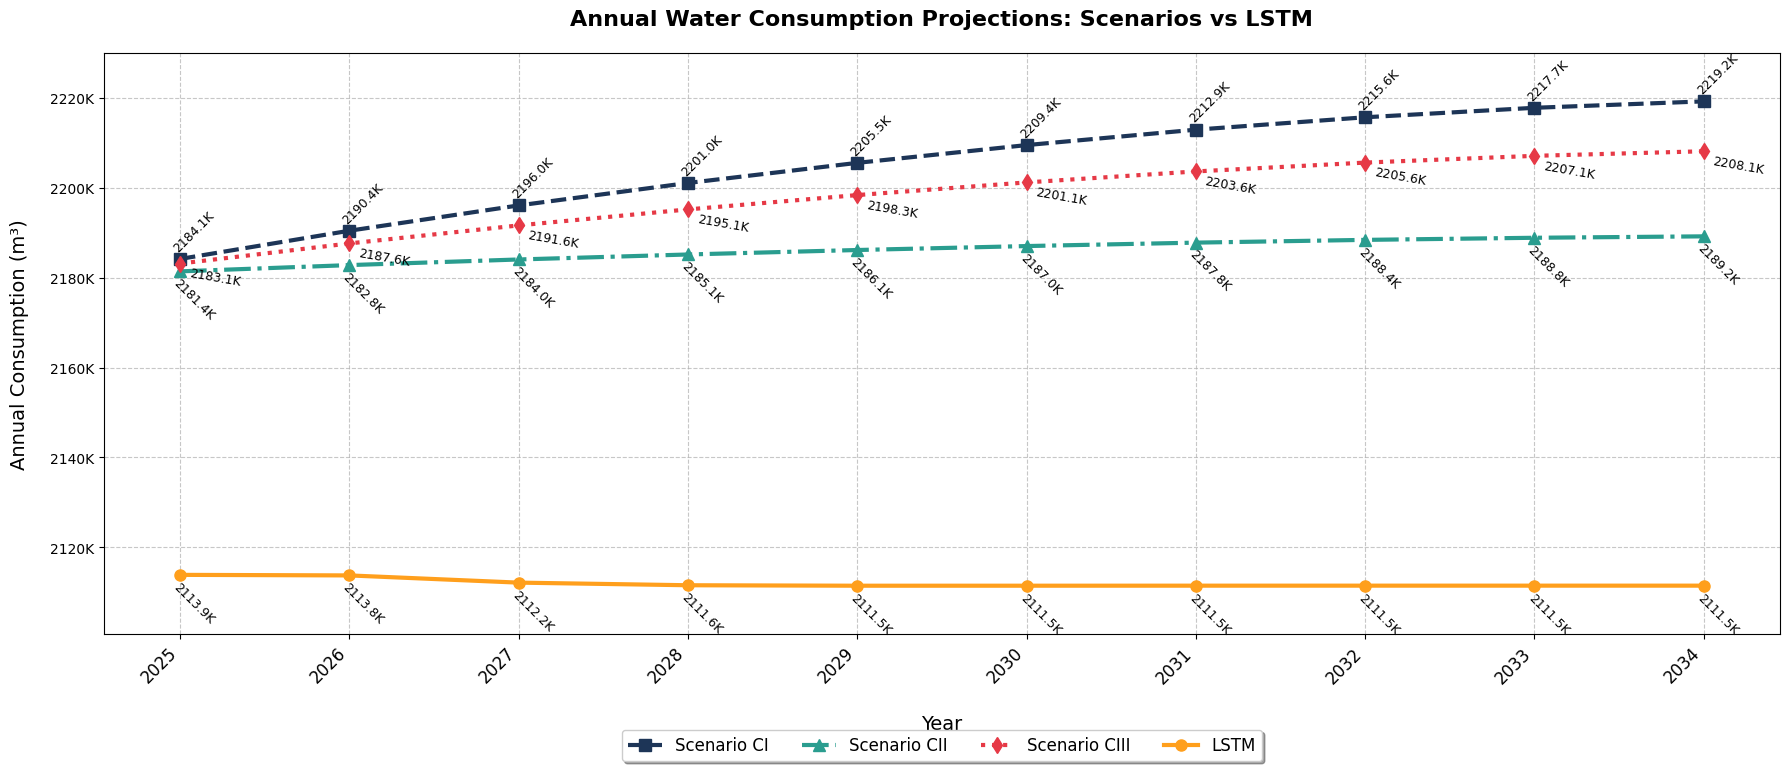

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = 'C:\\Users\\Edmilson\\Gama_Workspace2\\ABMS-WP'

# 1. Load data
scenario_file = os.path.join(path, 'resultados\\dados_simulacao3.csv')
df_scenarios = pd.read_csv(scenario_file)
df_scenarios.columns = ['Month/Year', 'Scenario CI', 'Scenario CII', 'Scenario CIII']
df_scenarios['Date'] = pd.to_datetime(df_scenarios['Month/Year'], format='%m/%Y')
df_scenarios = df_scenarios[df_scenarios['Date'] <= pd.to_datetime('2034-12-31')]

# 2. Load LSTM predictions
lstm_file = os.path.join(path, 'modelos IA\\previsoes_futuras_2025_2035.csv')
df_lstm = pd.read_csv(lstm_file, parse_dates=['Data'])
df_lstm = df_lstm[df_lstm['Data'] <= pd.to_datetime('2034-12-31')]
df_lstm = df_lstm.rename(columns={'Data': 'Date', 'Valor Previsto': 'LSTM'})

# 3. Merge data and calculate annual sums
df_combined = pd.merge(df_scenarios, df_lstm, on='Date', how='left')
df_combined['Year'] = df_combined['Date'].dt.year

# Calculate annual sums
df_annual = df_combined.groupby('Year').sum(numeric_only=True).reset_index()
scenario_period = f"{df_combined['Year'].min()}-{df_combined['Year'].max()}"

# 4. Configure plot
plt.figure(figsize=(18, 8))
ax = plt.gca()

# Style configuration
style_config = {
    'Scenario CI': {'color': '#1D3557', 'linestyle': '--', 'marker': 's'},
    'Scenario CII': {'color': '#2A9D8F', 'linestyle': '-.', 'marker': '^'},
    'Scenario CIII': {'color': '#E63946', 'linestyle': ':', 'marker': 'd'},
    'LSTM': {'color': '#FF9F1C', 'linestyle': '-', 'marker': 'o'}
}

# 5. Plot annual sums
for series in style_config:
    ax.plot(df_annual['Year'], df_annual[series],
            **style_config[series],
            linewidth=3,
            markersize=8,
            label=series)

# 6. Configure axes with K formatting
ax.set_xticks(df_annual['Year'])
ax.set_xticklabels(df_annual['Year'], rotation=45, ha='right', fontsize=12)

# Format Y axis in thousands (K)
def format_func(value, tick_number):
    return f'{value/1000:.0f}K'

ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel(f"Year\nPeriod: {scenario_period}", fontsize=14, labelpad=20)
plt.ylabel('Annual Consumption (m³)', fontsize=14, labelpad=15)
plt.title('Annual Water Consumption Projections: Scenarios vs LSTM', fontsize=16, pad=20, fontweight='bold')

# 7. Add labels with LSTM at -45°
def add_labels():
    for year in df_annual['Year']:
        row = df_annual[df_annual['Year'] == year].iloc[0]
        offsets = {
            'Scenario CI': (10, 20),
            'Scenario CII': (10, -20),
            'Scenario CIII': (25, -10),
            'LSTM': (10, -20)
        }
        rotations = {
            'Scenario CI': 45,
            'Scenario CII': -45,
            'Scenario CIII': -10,
            'LSTM': -45  # Specific rotation for LSTM
        }
        for series in style_config:
            if not pd.isna(row[series]):
                ax.annotate(f'{row[series]/1000:.1f}K',
                          (year, row[series]),
                          textcoords="offset points", 
                          xytext=offsets[series],
                          ha='center',
                          va='center',
                          fontsize=9,
                          rotation=rotations[series])

add_labels()

# 8. Adjust Y-axis zoom (10% padding)
all_values = df_annual[list(style_config.keys())]
data_range = all_values.max().max() - all_values.min().min()
ymin = all_values.min().min() - 0.1 * data_range
ymax = all_values.max().max() + 0.1 * data_range
ax.set_ylim(max(ymin, 0), ymax)  # Ensure minimum is not negative

# 9. Final elements
plt.grid(True, linestyle='--', alpha=0.7)

# Move legend to footer
legend = plt.legend(fontsize=12, framealpha=1, shadow=True,
                   loc='upper center', bbox_to_anchor=(0.5, -0.15),
                   ncol=4)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Adjust to make space for footer legend
plt.show()

In [10]:
df_lstm

,Date,LSTM
0,2025-01-01,180626.61
1,2025-02-01,180203.67
2,2025-03-01,179109.73
3,2025-04-01,176688.50
4,2025-05-01,175119.78
...,...,...
115,2034-08-01,175959.28
116,2034-09-01,175959.28
117,2034-10-01,175959.28
118,2034-11-01,175959.30
